In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset

In [2]:

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Select only two classes: Setosa (0) and Versicolor (1)

In [3]:
binary_filter = y < 2
X = X[binary_filter]
y = y[binary_filter]

# Select two features: sepal length (0), sepal width (1)
X = X[:, :2]

# Convert labels from (0,1) → (-1,+1)
y = np.where(y == 0, -1, 1)

print(f"Data shape: {X.shape}, Labels: {np.unique(y)}")


Data shape: (100, 2), Labels: [-1  1]


# Perceptron coding

In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_epochs=10):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = []
        self.bias = 0

    def predict(self, x):
        activation = sum(w * xi for w, xi in zip(self.weights, x)) + self.bias
        return 1 if activation >= 0 else -1

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0.0] * n_features
        self.bias = 0

        print("Initial weights:", self.weights)
        print("Initial bias:", self.bias)
        print("-" * 40)

        for epoch in range(1, self.n_epochs + 1):
            print(f"Epoch {epoch}")
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if prediction != target:
                    update = self.lr * target
                    self.weights = [w + update * xij for w, xij in zip(self.weights, xi)]
                    self.bias += update
                    print(f"  Misclassified: prediction={prediction}, y={target}")
                    print(f"  → Update: Δw = {update}, new weights = {self.weights}, new bias = {self.bias}")
                else:
                    print(f"  Correct: x={prediction}, y={target}")
            print("-" * 40)

    def final_model(self):
        return self.weights, self.bias


In [14]:
model = Perceptron(learning_rate=0.01, n_epochs=200)
model.fit(X.tolist(), y.tolist())

Initial weights: [0.0, 0.0]
Initial bias: 0
----------------------------------------
Epoch 1
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.01, new weights = [-0.051, -0.035], new bias = -0.01
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Corr

# Predict by perceptron

In [20]:
y_pred=[]
for i in X:
    y_pred.append(model.predict(i))

# Plotting decision boundary

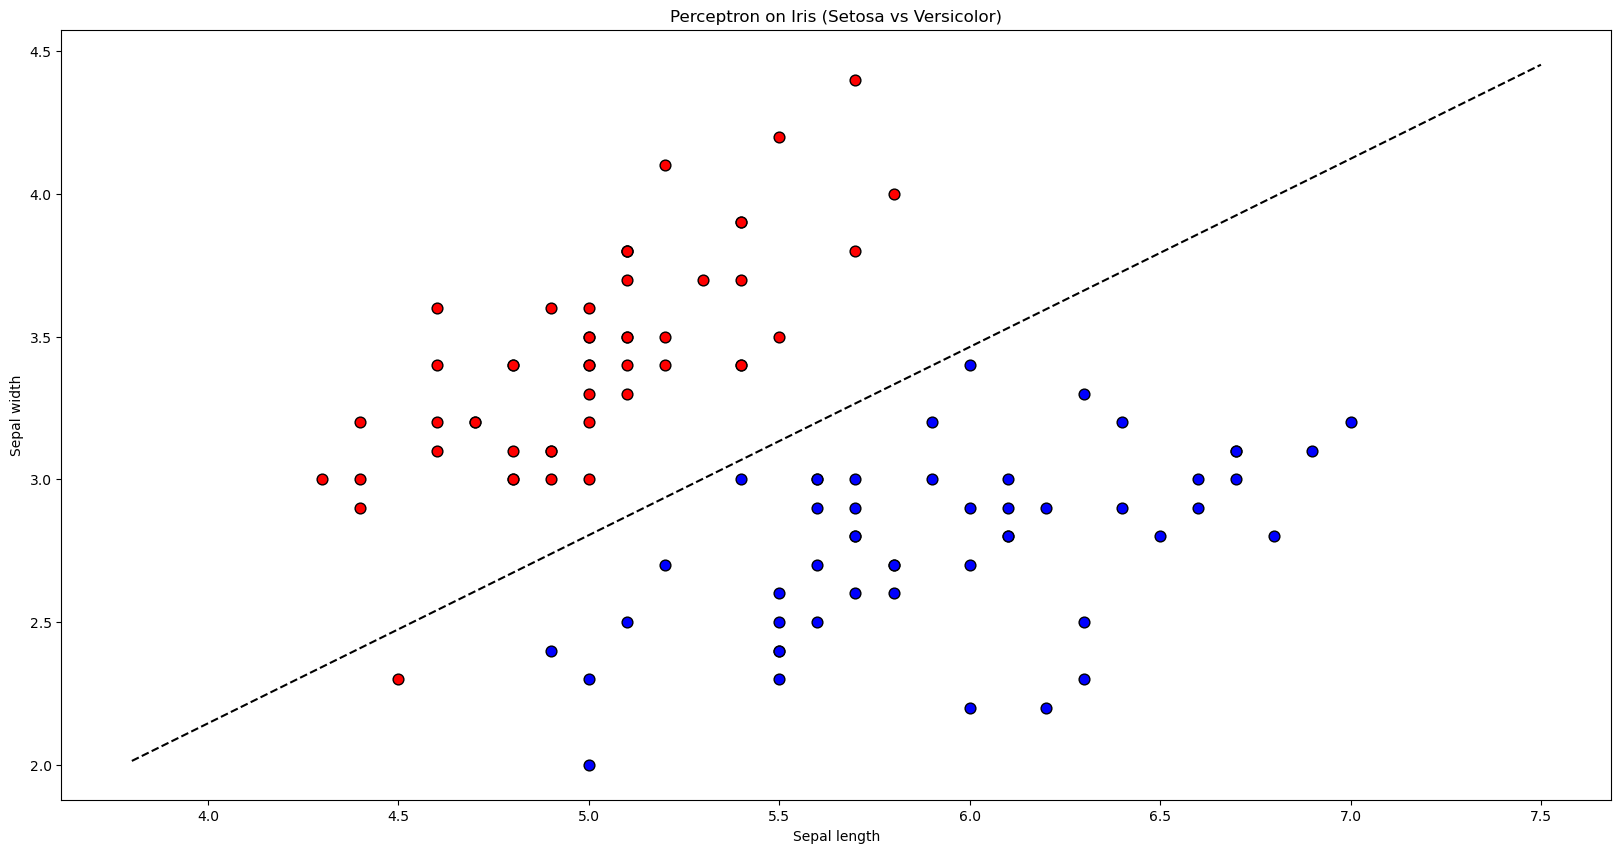

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(20,10))

# Plot data points
for xi, label in zip(X, y):
    color = 'blue' if label == 1 else 'red'
    ax.scatter(xi[0], xi[1], c=color, s=60, edgecolors='k', label=f"Class {label}")
# Decision boundary
w1, w2 = model.weights
b = model.bias
x1_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200)
x2_vals = -(w1 * x1_vals + b) / w2 if w2 != 0 else np.full_like(x1_vals, -b / w1)

ax.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Perceptron on Iris (Setosa vs Versicolor)')
#plt.legend()
#plt.grid(True)
plt.show()


In [23]:
# Assuming binary labels: -1 = Class 0, +1 = Class 1
TP = sum((yt == 1) and (yp == 1) for yt, yp in zip(y, y_pred))
TN = sum((yt == -1) and (yp == -1) for yt, yp in zip(y, y_pred))
FP = sum((yt == -1) and (yp == 1) for yt, yp in zip(y, y_pred))
FN = sum((yt == 1) and (yp == -1) for yt, yp in zip(y, y_pred))

# Metrics
accuracy = (TP + TN) / len(y)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Display
print("\n🔍 Classification Report (Manual)")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\n🧾 Confusion Matrix")
print(f"           Pred -1   Pred +1")
print(f"Actual -1    {TN:5}      {FP:5}")
print(f"Actual +1    {FN:5}      {TP:5}")


🔍 Classification Report (Manual)
Accuracy  : 0.9900
Precision : 0.9804
Recall    : 1.0000
F1 Score  : 0.9901

🧾 Confusion Matrix
           Pred -1   Pred +1
Actual -1       49          1
Actual +1        0         50
